# Steady flow through a cylinder array at an angle ($Re=40$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1 = ib.stretching(192, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
s2 = ib.stretching(96, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
x = np.concatenate([-s2[::-1], s1[1:]])

s = ib.stretching(31, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
y = np.concatenate([-s[::-1], s[1:]])

solver = ib.Solver(x, y, periodic=True, iRe=1/40.0, Co=0.5)

In [4]:
(len(y)-1)/3

20.0

## Immersed boundaries

In [5]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, solver.dxmin))

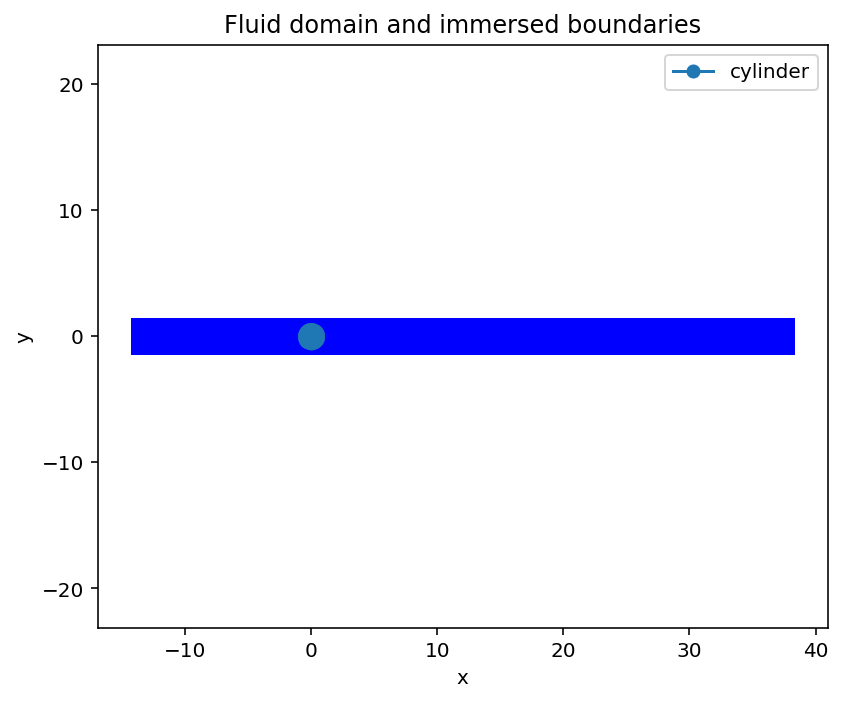

In [6]:
solver.plot_domain(figsize=(6, 5))

## Boundary conditions

In [7]:
uBC, vBC = solver.zero_boundary_conditions()

α = 30*np.pi/180
for k in range(2):
    uBC[k][:] = np.cos(α)
    vBC[k][:] = np.sin(α)

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Steady simulation

In [8]:
x = solver.zero(); 
x[:solver.fluid.u.size] = np.cos(α)
x[solver.fluid.u.size:solver.fluid.u.size+solver.fluid.v.size] = np.sin(α)

In [9]:
%time x, infodict = solver.steady_state(x, uBC, vBC, sBC, outflowEast=False)

   k   residual_x   residual_f  cylinder_fx  cylinder_fy 
   1  6.56822e-01  1.93322e+01  4.89611e+00  7.89167e-01 
   2  4.65868e-01  3.49994e-01  2.62727e+00  1.05972e+00 
   3  1.75243e-01  1.20224e-01  2.80393e+00  1.03009e+00 
   4  9.11572e-02  9.99637e-02  2.80584e+00  1.06048e+00 
   5  4.86276e-02  3.32526e-02  2.80551e+00  1.06121e+00 
   6  9.65526e-03  8.02880e-03  2.80551e+00  1.06121e+00 
   7  3.53648e-04  3.44441e-04  2.80551e+00  1.06121e+00 
   8  5.44479e-07  5.02525e-07  2.80551e+00  1.06121e+00 
   9  1.84458e-12  1.29791e-12  2.80551e+00  1.06121e+00 
CPU times: user 1min 57s, sys: 5.35 s, total: 2min 3s
Wall time: 6.1 s


## Display results

Display velocity field and pressure

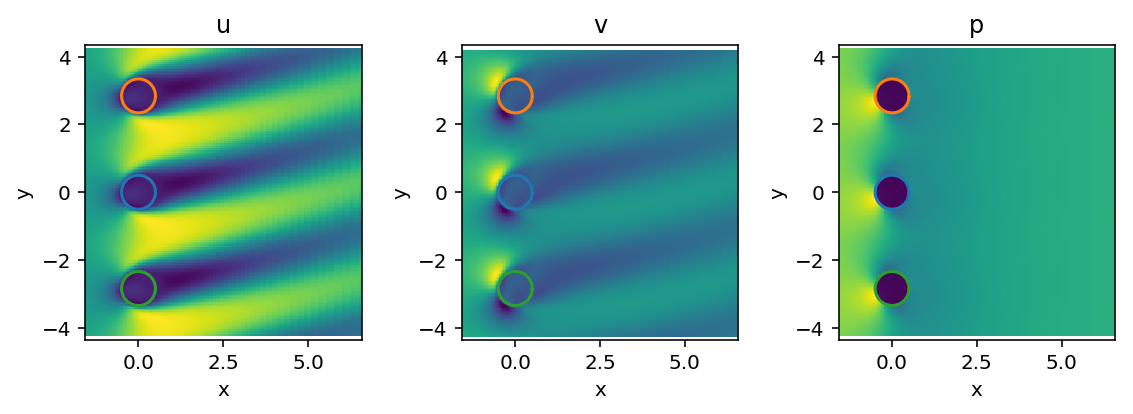

In [10]:
solver.plot_field(x, xlim=(-1, 6), ylim=(-4, 4), repeat=True)

Show convergence history

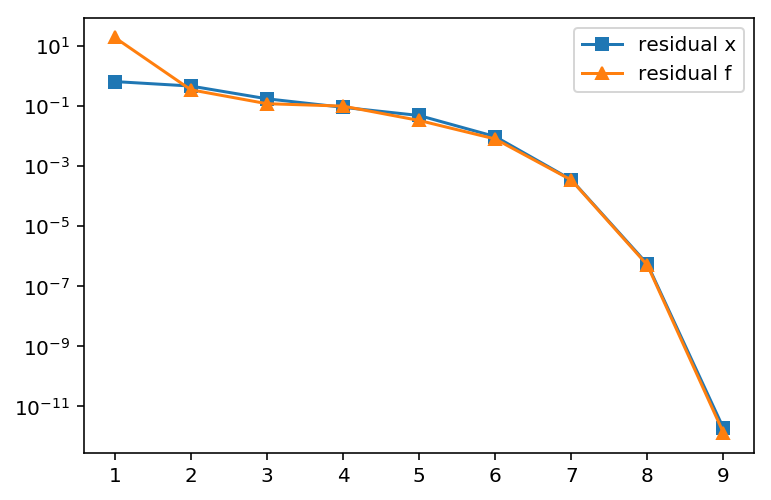

In [11]:
from matplotlib.ticker import MaxNLocator
k = np.arange(1, len(infodict['residual_x'])+1)
plt.semilogy(k, infodict['residual_x'], 's-', label='residual x')
plt.semilogy(k, infodict['residual_f'], '^-', label='residual f')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend();